In [1]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
train_datagen=ImageDataGenerator(rescale=1./255,zoom_range=0.2,horizontal_flip=True,vertical_flip=False)

In [3]:
test_datagen=ImageDataGenerator(rescale=1./255)

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
x_train=train_datagen.flow_from_directory('/content/drive/MyDrive/DATA COLLECTION/Dataset Plant Disease/Veg-dataset/Veg-dataset/train_set', class_mode='categorical',batch_size=24)

Found 1324 images belonging to 9 classes.


In [7]:
x_test=test_datagen.flow_from_directory('/content/drive/MyDrive/DATA COLLECTION/Dataset Plant Disease/Veg-dataset/Veg-dataset/train_set', class_mode='categorical',batch_size=24)

Found 1324 images belonging to 9 classes.


In [8]:
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense,Convolution2D,MaxPooling2D,Flatten

In [9]:
model=Sequential()

In [10]:
model.add(Convolution2D(32,(3,3),input_shape=(128,128,3),activation='relu'))

In [11]:
model.add(MaxPooling2D(pool_size=(2,2)))

In [12]:
model.add(Flatten())

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 63, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 127008)            0         
                                                                 
Total params: 896
Trainable params: 896
Non-trainable params: 0
_________________________________________________________________


In [14]:
model.add(Dense(300,activation='relu')) 
model.add(Dense(150,activation='relu'))

In [15]:
model.add(Dense(9,activation='softmax'))

In [16]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [17]:
len(x_train)

56

In [18]:
1238/24

51.583333333333336

In [ ]:
model.fit(x_train,steps_per_epoch=len(x_train),validation_data=x_test,validation_steps=len(x_test),epochs=10)

In [20]:
model.save('vegetabledata.h5')

In [21]:
import numpy as np 
from tensorflow.keras.models import load_model 
from tensorflow.keras.preprocessing import image

In [22]:
model=load_model('vegetabledata.h5')

In [23]:
img=image.load_img('/content/drive/MyDrive/DATA COLLECTION/Dataset Plant Disease/Veg-dataset/Veg-dataset/train_set/Pepper,_bell___healthy/0d4e35c0-f6d6-4810-9522-14e1d491a05d___JR_HL 8673.JPG')

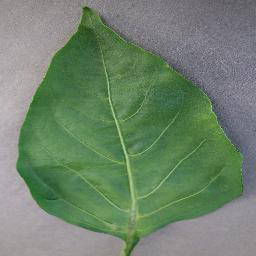

In [24]:
img

In [25]:
x=image.img_to_array(img)

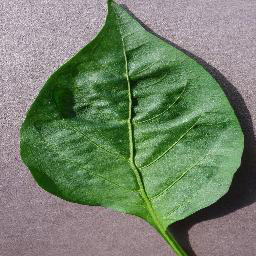

In [26]:
img=image.load_img('/content/drive/MyDrive/DATA COLLECTION/Dataset Plant Disease/Veg-dataset/Veg-dataset/train_set/Pepper,_bell___healthy/0ade14b6-8937-43ea-93eb-98343af6bae7___JR_HL 8026.JPG')
img

In [27]:
x=image.img_to_array(img)

In [28]:
x

array([[[188., 176., 186.],
        [149., 137., 147.],
        [212., 200., 210.],
        ...,
        [157., 145., 155.],
        [162., 150., 160.],
        [162., 150., 160.]],

       [[195., 183., 193.],
        [220., 208., 218.],
        [185., 173., 183.],
        ...,
        [177., 165., 175.],
        [186., 174., 184.],
        [180., 168., 178.]],

       [[185., 173., 183.],
        [188., 176., 186.],
        [189., 177., 187.],
        ...,
        [164., 152., 162.],
        [173., 161., 171.],
        [163., 151., 161.]],

       ...,

       [[125., 106., 112.],
        [126., 107., 113.],
        [130., 111., 117.],
        ...,
        [133., 114., 120.],
        [141., 122., 128.],
        [146., 127., 133.]],

       [[123., 104., 110.],
        [137., 118., 124.],
        [145., 126., 132.],
        ...,
        [119., 100., 106.],
        [123., 104., 110.],
        [131., 112., 118.]],

       [[159., 140., 146.],
        [151., 132., 138.],
        [137., 1

In [29]:
x=np.expand_dims(x,axis=0)

In [30]:
x

array([[[[188., 176., 186.],
         [149., 137., 147.],
         [212., 200., 210.],
         ...,
         [157., 145., 155.],
         [162., 150., 160.],
         [162., 150., 160.]],

        [[195., 183., 193.],
         [220., 208., 218.],
         [185., 173., 183.],
         ...,
         [177., 165., 175.],
         [186., 174., 184.],
         [180., 168., 178.]],

        [[185., 173., 183.],
         [188., 176., 186.],
         [189., 177., 187.],
         ...,
         [164., 152., 162.],
         [173., 161., 171.],
         [163., 151., 161.]],

        ...,

        [[125., 106., 112.],
         [126., 107., 113.],
         [130., 111., 117.],
         ...,
         [133., 114., 120.],
         [141., 122., 128.],
         [146., 127., 133.]],

        [[123., 104., 110.],
         [137., 118., 124.],
         [145., 126., 132.],
         ...,
         [119., 100., 106.],
         [123., 104., 110.],
         [131., 112., 118.]],

        [[159., 140., 146.],
       

In [31]:
y=np.expand_dims(x,axis=0)

In [ ]:
y=np.argmax(model.predict(x),axis = 1)

In [33]:
x_train.class_indices

{'Pepper,_bell___Bacterial_spot': 0,
 'Pepper,_bell___healthy': 1,
 'Potato___Early_blight': 2,
 'Potato___Late_blight': 3,
 'Potato___healthy': 4,
 'Tomato___Bacterial_spot': 5,
 'Tomato___Late_blight': 6,
 'Tomato___Leaf_Mold': 7,
 'Tomato___Septoria_leaf_spot': 8}

In [34]:
index=['Pepper,bell_Bacterial_spot','Pepper,_bell_healthy','Potato_Early_blight','Potato__Late_blight']

In [ ]:
index[y[0]]

In [39]:
img=image.load_img('/content/drive/MyDrive/DATA COLLECTION/Dataset Plant Disease/Veg-dataset/Veg-dataset/train_set/Pepper,_bell___healthy/00208a93-7687-4e8c-b79e-3138687e0f38___JR_HL 7955.JPG') 

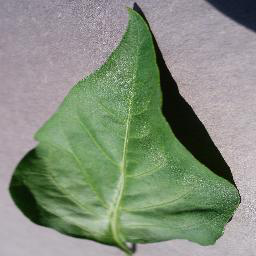

In [40]:
img